In [1]:
import pandas as pd
import seaborn as sns
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_restaurantes = pd.read_csv("df_restaurantes.csv").drop(["Unnamed: 0", "Unnamed: 159"], axis=1)
df_restaurantes.drop_duplicates(subset=['nome', 'cep'], keep='first', inplace=True)
print("A base é composta de {} observações e {} features.".format(df_restaurantes.shape[0], df_restaurantes.shape[1]))

A base é composta de 13912 observações e 158 features.


In [3]:
def boxplot_esquerda(linha, coluna, posicao, variavelx, variavely, legenday):
    
    fig.add_subplot(linha, 
                    coluna, 
                    posicao)
    ax = sns.boxplot(data=df_restaurantes_preco, 
                     x=variavelx, 
                     y=variavely, 
                     showmeans=True,
                     meanprops={"marker":"o",
                                "markerfacecolor":"white",
                                "markeredgecolor":"white",
                                "markersize":"3"})
    ax.set_xlabel(variavelx, 
                  fontsize=8)
    ax.set_ylabel(legenday, 
                  fontsize=10)

def boxplot_direita(linha, coluna, posicao, variavelx, variavely):
    
    fig.add_subplot(linha, 
                    coluna, 
                    posicao)
    ax = sns.boxplot(data=df_restaurantes_preco, 
                     x=variavelx, 
                     y=variavely, 
                     showmeans=True,
                     meanprops={"marker":"o",
                                "markerfacecolor":"white",
                                "markeredgecolor":"white",
                                "markersize":"3"})
    ax.set_xlabel(variavelx, 
                  fontsize=8)
    ax.set_ylabel('', 
                  fontsize=10)
    ax.set(yticklabels=[])

In [4]:
df_restaurantes.dtypes

nome             object
cep               int64
pontuacao       float64
n_avaliacoes      int64
avaliacoes       object
                 ...   
zona_centro       int64
zona_leste        int64
Zona_norte        int64
zona_oeste        int64
zona_sul          int64
Length: 158, dtype: object

### Variáveis:
- **nome**: nome do restaurante;
- **cep**: CEP do restaurante;
- **pontuacao**: pontuação média do restaurantes com base nas avaliações dos usuários do Trip Advisor;
- **n_avaliacoes**: número de avaliações que o restaurante tem na plataforma;
- **avaliações**: avaliações realizadas por usuários para aquele restaurante;
- **pontuacao_**: pontuações que usuários deram para as seguintes características dos restaurantes: comida, serviço, preco, ambiente;
- **preco_inicial**: menor preço praticado pelo restaurante segundo o Trip Advisor;
- **preco_final**: maior preço praticado;
- **coz_**: variáveis *dummie* que apresenta valor igual a 1 caso o restaurante forneça comida da cozinha em questão e 0 para caso contrário. Tipos de cozinha: *africana, albanesa, alemã, americana, argentina, armena, asiática, asiática central, australiana, bar, belga, brasileira, britânica, café, cajun e creole, campania, canadense, caribenha, catalunha, centro da itália, centro americana, chilena, chinesa, churrasco, colombiana, comida de rua, comidas terapêuticas, contemporânea, coreana, culinária de hokkaido, culinária de fusão japonesa, bangladesh, delicatessen, dinamarquesa, doceria japonesa, egípcia, escandinava, espanhola, europeia, europeia central, fast food, francesa, frutos do mar, fusion, grega, grelhados, havaiana, hungara, indiana, indonesia, internacional, irlandesa, israelense, italiana, japonesa, lanchonete, latina, leste europeia, libanesa, lacioa, malaia, marroquina, mediterrânea, mexicana, mongol, nativa americana, norte da itália, norueguesa, napoles, oriente médio, peruana, pizza, portuguesa, pub, pub com cerveja artesanal, pub com restaurante, restaurante com bar, restaurante que serve cerveja, romana, saudável, silicia, sopa, steakhouse, sueca, sul da itália, sul americana, sushi, suíça, tailandesa, taiwan, toscana, turca, vietnamita, wine bar, árabe*;
- **ref_**: *dummies* com valor 1 caso o restaurante sirva a refeição específica e 0 caso contrário. Tipos de refeição: *aberto até tarde, almoço, bruch, café da manhã, drinks, jantar*;
- **dietas_**: *dummies* com valor 1 caso o restaurante tenha opção da dieta em questão, 0 caso contrário. Tipos de dieta: *kosher, opções sem glúten, veganas, vegetarianas*;
- **vantagem_**: *dummies* com valor 1 caso o restaurante apresente a vantagem em questão, 0 caso contrário. Tipos de vantagem: *aceita american express, aceita discover, aceita mastercard, aceita visa, acesso para cadeirantes, apenas dinheiro, balcao externo, bar completo, bar de esportes, bufe, cadeiras para bebês, entrega, estacionamento com manobrista, estacionamento com validação, estacionamento disponível, estacionamento na rua, estacionamento provado grátis, familiar, lugares para sentar, mesas ao ar livre, música ao vivo, pagamento digital, para levar, permite cães, reservas, restaurante privativo, restaurante para não fumantes, serve bebida alcoolica, serviço de mesa, televisão, traga sua própria bebida, vales presente disponíveis, vinho e cerveja, wi-fi gratuito, áreas de lazer*;
- **preco_medio**: preço obtido através da média entre preço inicial e final;
- **zona_**: *dummies* com valor 1 caso o restaurante esteja na zona em questão e 0 caso contrário. Zonas: *centro, leste, norte, oeste, sul*;

### Examinando a feature target: Preço Médio

In [5]:
df_restaurantes[['preco_medio', 'preco_inicial', 'preco_final']].value_counts().sort_values(ascending=False)

preco_medio  preco_inicial  preco_final
0.0          0              0.0            12921
40.0         30             50.0              16
75.0         50             100.0             13
50.0         20             80.0              11
90.5         78             103.0             10
                                           ...  
147.5        88             207.0              1
146.5        113            180.0              1
154.0        51             257.0              1
132.0        114            150.0              1
604.5        320            889.0              1
Length: 664, dtype: int64

Existem 12.921 restaurantes sem informações de preço. Como a primeira parte dessa análise envolve entender os determinantes do preço, vamos criar uma nova base que considere apenas as observações que tenham preço médio. Posteriormente, usaremos a base completa para realizar uma análise de sentimento e verificar quais fatores determinam as notas médias de cada restaurante.

In [6]:
df_restaurantes_preco = df_restaurantes.query('preco_medio != 0')
df_restaurantes_preco.head(5)

,nome,cep,pontuacao,n_avaliacoes,avaliacoes,pontuacao_comida,pontuacao_servico,pontuacao_preco,pontuacao_ambiente,preco_inicial,...,vantagem_vales_presente_disponiveis,vantagem_vinho_e_cerveja,vantagem_wi_fi_gratuito,vantagem_areas_de_lazer,preco_medio,zona_centro,zona_leste,Zona_norte,zona_oeste,zona_sul
0,Luce Oscar Freire,1426001,4.0,45,"[{'usuario': 'flavioa557', 'titulo': 'Qualidad...",4.0,4.5,4.5,NaN,120,...,0,0,0,0,235.0,1,0,0,0,0
2,Johnny Rockets,1426001,4.5,412,"[{'usuario': 'P695GMdanielz', 'titulo': 'Avali...",4.5,4.0,4.0,NaN,30,...,0,0,0,0,40.0,1,0,0,0,0
3,Tanit,1426001,4.5,688,"[{'usuario': 'Voyage51787716002', 'titulo': 'M...",4.5,4.5,4.5,NaN,70,...,0,0,0,0,80.0,1,0,0,0,0
16,P. J. Clarke's,1426001,4.0,255,"[{'usuario': 'veralunardi', 'titulo': 'Lugar p...",4.0,4.0,4.0,3.5,103,...,0,0,0,0,116.0,1,0,0,0,0
44,Bácaro Bar & Cucina,1426001,4.0,31,"[{'usuario': 'jorgelacerda', 'titulo': 'Bar mu...",4.0,4.5,4.5,NaN,41,...,0,0,0,0,252.0,1,0,0,0,0


In [7]:
# Criando um DataFrame apenas com observações com preço:
df_restaurantes_preco = df_restaurantes_preco
df_restaurantes_preco.to_csv('df_restaurantes_preco.csv')

### Examinando a relação do preço médio e outras features da base:

O primeiro conjunto de dummies que vamos examinar é o que define a **distribuição geográfica dos restaurantes**. *Nessa análise, faz sentido pensar que regiões mais elitizadas terão preços médios mais altos.* A mediana dos preços médios do centro, zona oeste e da zona sul individualmente parecem não se diferenciar das outras regiões. A distribuição das duas primeiras regiões é mais dispersa, enquanto que, a distribuição da zona sul é mais concentrada em torno da mediana, apesar de ter o restaurante com o maior preço médio da base. No que diz respeito à mediana, essa avaliação também se aplica ao preço mínimo e máximo.
<br>
<br>
A mediana dos preços médios da zona norte e zona leste parecem ser menores se comparado ao todo, com distribuição mais "achatada" em torno dela, o que pode indicar que os preços são menores nessas regiões. Essa avaliação também se aplica ao preço mínimo e máximo.

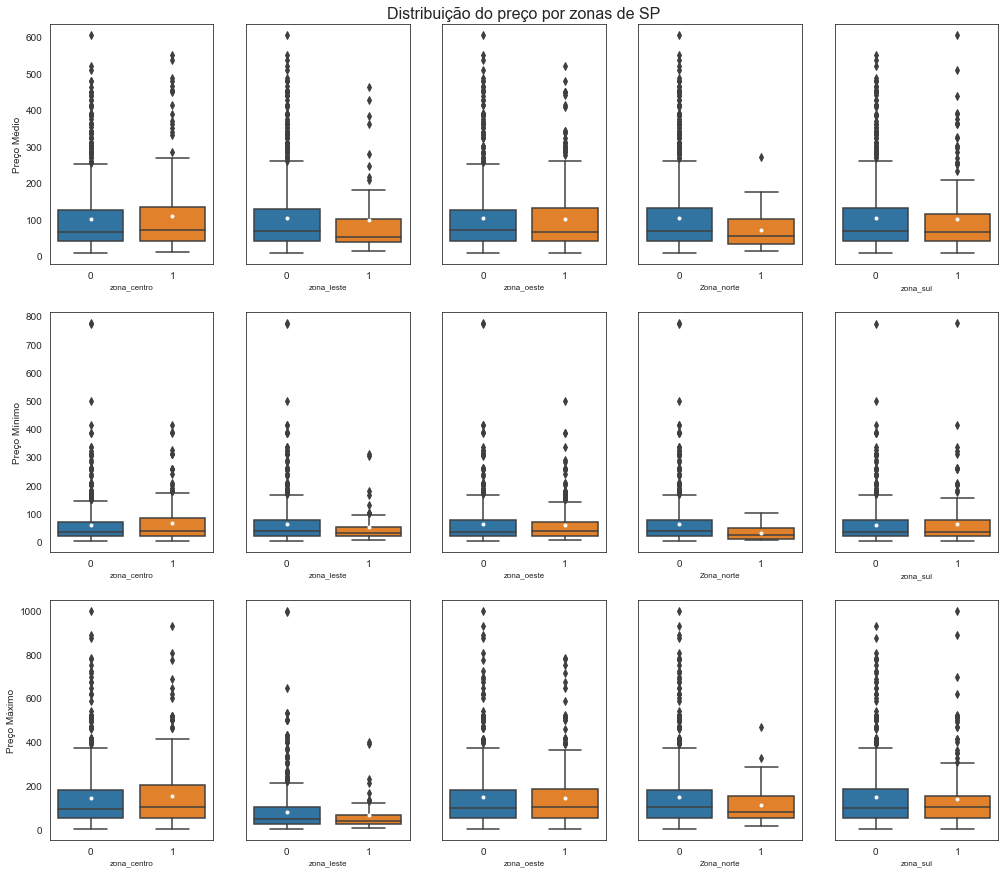

In [8]:
sns.set_style("white") # Grid do gráfico.
sns.color_palette("Spectral", as_cmap=True)
fig = plt.figure(figsize=(17,15))
plt.title('Distribuição do preço por zonas de SP', loc='center', fontsize=16)
plt.axis('off') # Retirando legendas 

boxplot_esquerda(3, 5, 1, "zona_centro", "preco_medio", "Preço Médio")
boxplot_direita(3, 5, 2, "zona_leste", "preco_medio")
boxplot_direita(3, 5, 3, "zona_oeste", "preco_medio")
boxplot_direita(3, 5, 4, "Zona_norte", "preco_medio")
boxplot_direita(3, 5, 5, "zona_sul", "preco_medio")
boxplot_esquerda(3, 5, 6, "zona_centro", "preco_inicial", "Preço Mínimo")
boxplot_direita(3, 5, 7, "zona_leste", "preco_inicial")
boxplot_direita(3, 5, 8, "zona_oeste", "preco_inicial")
boxplot_direita(3, 5, 9, "Zona_norte", "preco_inicial")
boxplot_direita(3, 5, 10, "zona_sul", "preco_inicial")
boxplot_esquerda(3, 5, 11, "zona_centro", "preco_final", "Preço Máximo")
boxplot_direita(3, 5, 12, "zona_leste", "preco_inicial")
boxplot_direita(3, 5, 13, "zona_oeste", "preco_final")
boxplot_direita(3, 5, 14, "Zona_norte", "preco_final")
boxplot_direita(3, 5, 15, "zona_sul", "preco_final")

plt.show()

Conforme vimos no boxplot, existem diversos restaurantes *outliers*. Vamos separar as informações discrepantes em outro dataframe e avaliar 

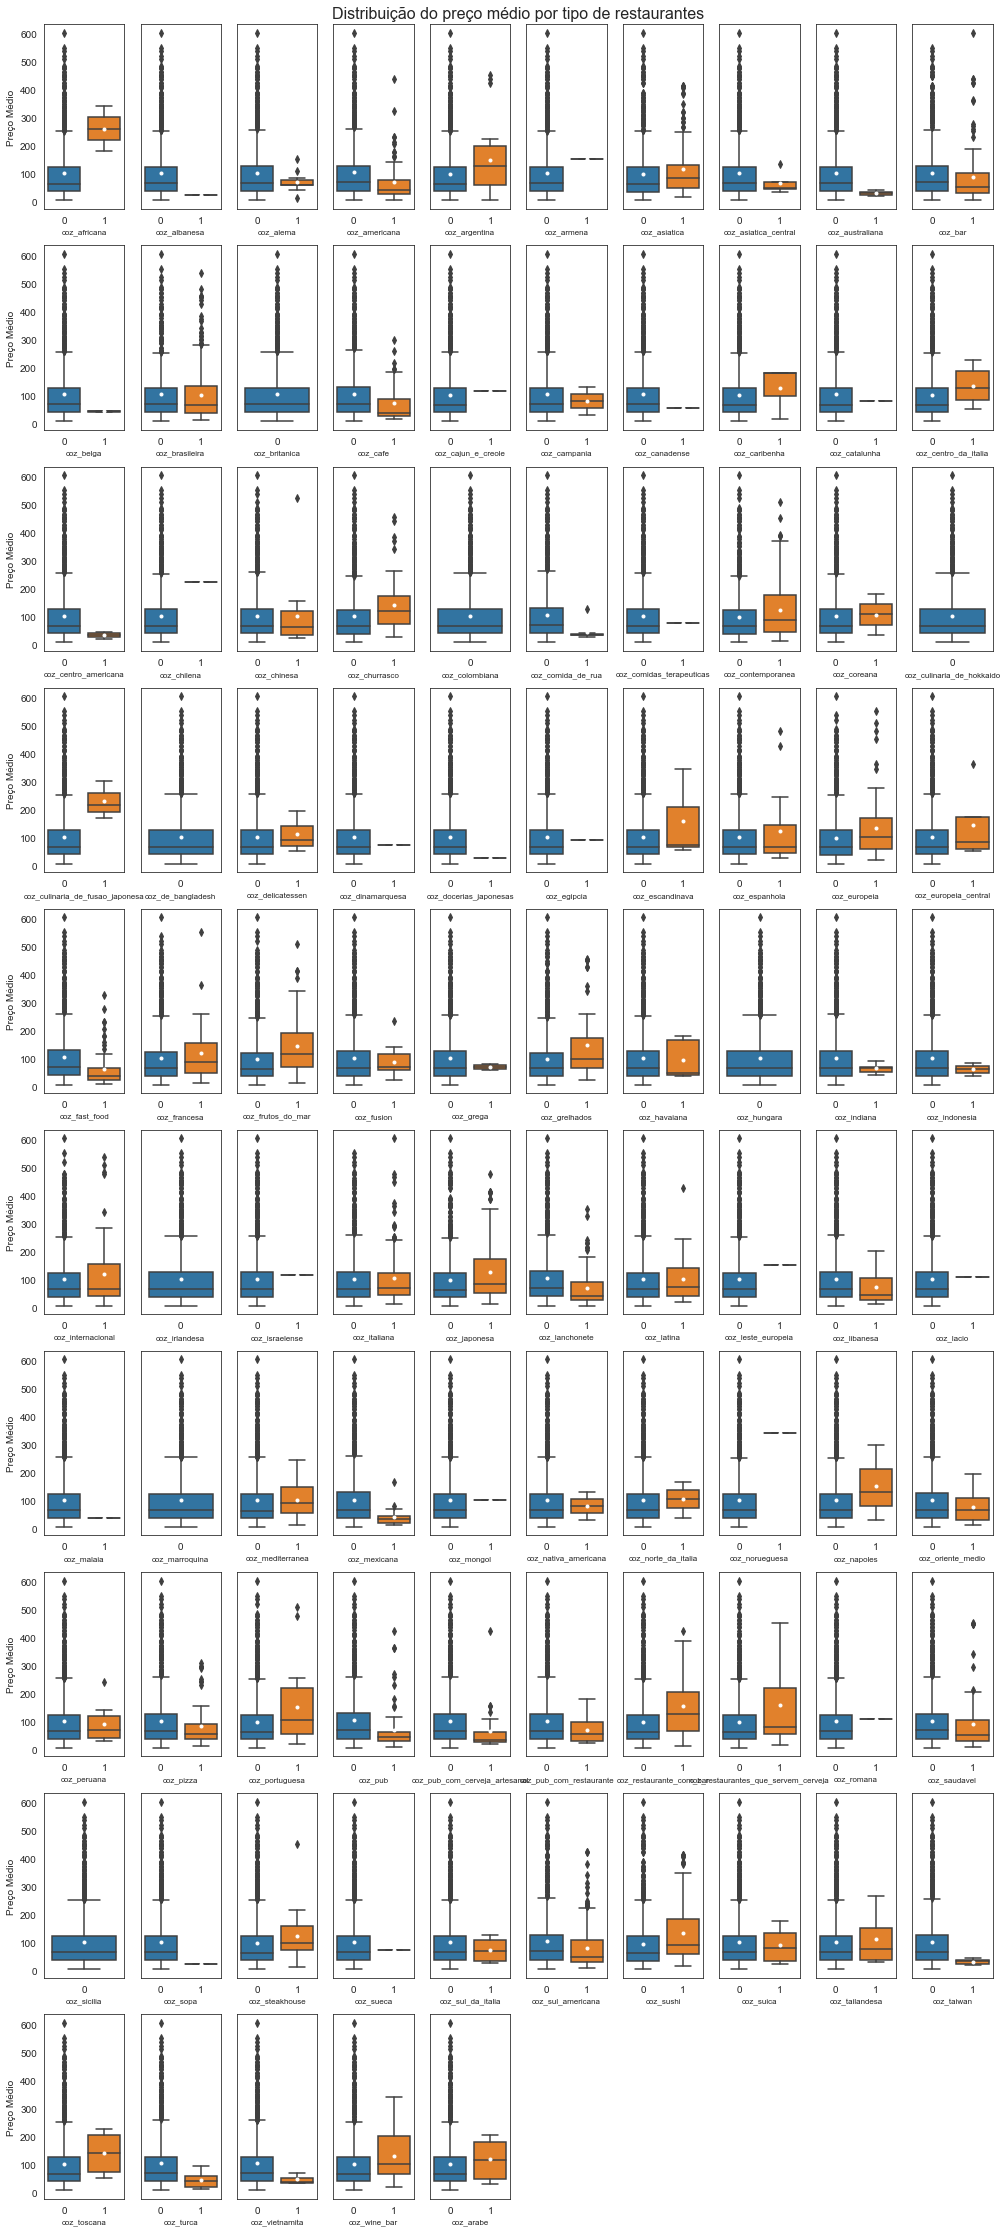

In [9]:
coz = ['coz']

for i in range(len(df_restaurantes_preco.columns)):
    
    if str(df_restaurantes_preco.columns[i])[:3] == str('coz'):
        coz.append(df_restaurantes_preco.columns[i])
    else:
        continue

sns.set_style("white") # Grid do gráfico.
sns.color_palette("Spectral", as_cmap=True)
fig = plt.figure(figsize=(17,40))
plt.title('Distribuição do preço médio por tipo de restaurantes', loc='center', fontsize=16)
plt.axis('off') # Retirando legendas 

for i in range(1, len(coz)):
    if (i in [1,11,21,31,41,51,61,71,81,91]):
        boxplot_esquerda(10, 10, i, coz[i], "preco_medio", "Preço Médio")
    else:
        boxplot_direita(10, 10, i, coz[i], "preco_medio")

plt.show()

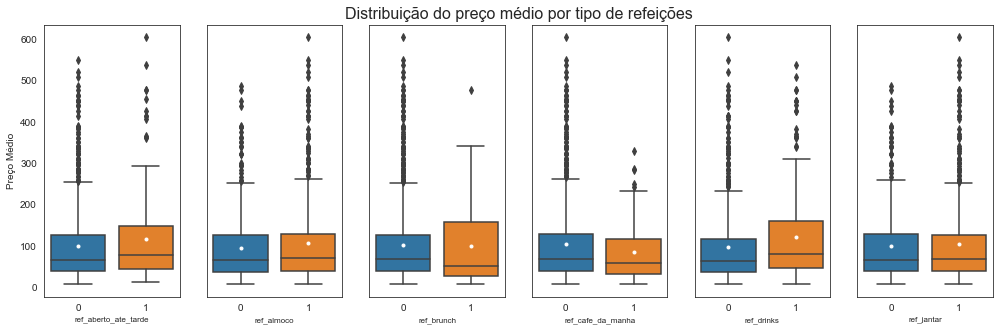

In [10]:
ref = ['ref']

for i in range(len(df_restaurantes_preco.columns)):
    
    if str(df_restaurantes_preco.columns[i])[:3] == str('ref'):
        ref.append(df_restaurantes_preco.columns[i])
    else:
        continue

sns.set_style("white") # Grid do gráfico.
sns.color_palette("Spectral", as_cmap=True)
fig = plt.figure(figsize=(17,5))
plt.title('Distribuição do preço médio por tipo de refeições', loc='center', fontsize=16)
plt.axis('off') # Retirando legendas 

for i in range(1, len(ref)):
    if (i in [1,11,21,31,41,51,61,71,81,91]):
        boxplot_esquerda(1, 6, i, ref[i], "preco_medio", "Preço Médio")
    else:
        boxplot_direita(1, 6, i, ref[i], "preco_medio")

plt.show()

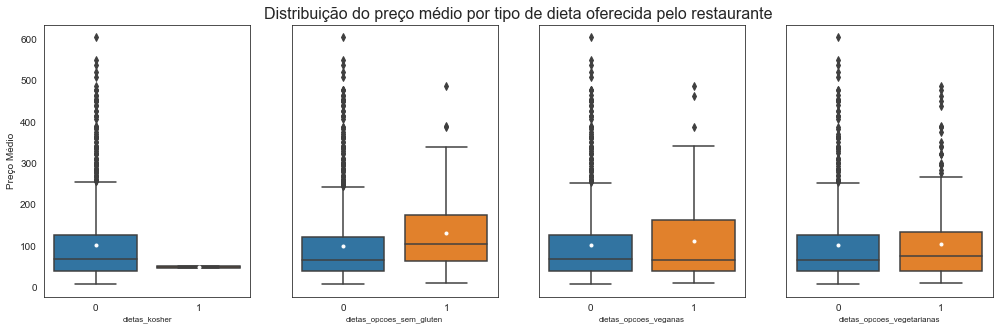

In [11]:
die = ['die']

for i in range(len(df_restaurantes_preco.columns)):
    
    if str(df_restaurantes_preco.columns[i])[:3] == str('die'):
        die.append(df_restaurantes_preco.columns[i])
    else:
        continue

sns.set_style("white") # Grid do gráfico.
sns.color_palette("Spectral", as_cmap=True)
fig = plt.figure(figsize=(17,5))
plt.title('Distribuição do preço médio por tipo de dieta oferecida pelo restaurante', loc='center', fontsize=16)
plt.axis('off') # Retirando legendas 

for i in range(1, len(die)):
    if (i in [1,11,21,31,41,51,61,71,81,91]):
        boxplot_esquerda(1, 4, i, die[i], "preco_medio", "Preço Médio")
    else:
        boxplot_direita(1, 4, i, die[i], "preco_medio")

plt.show()

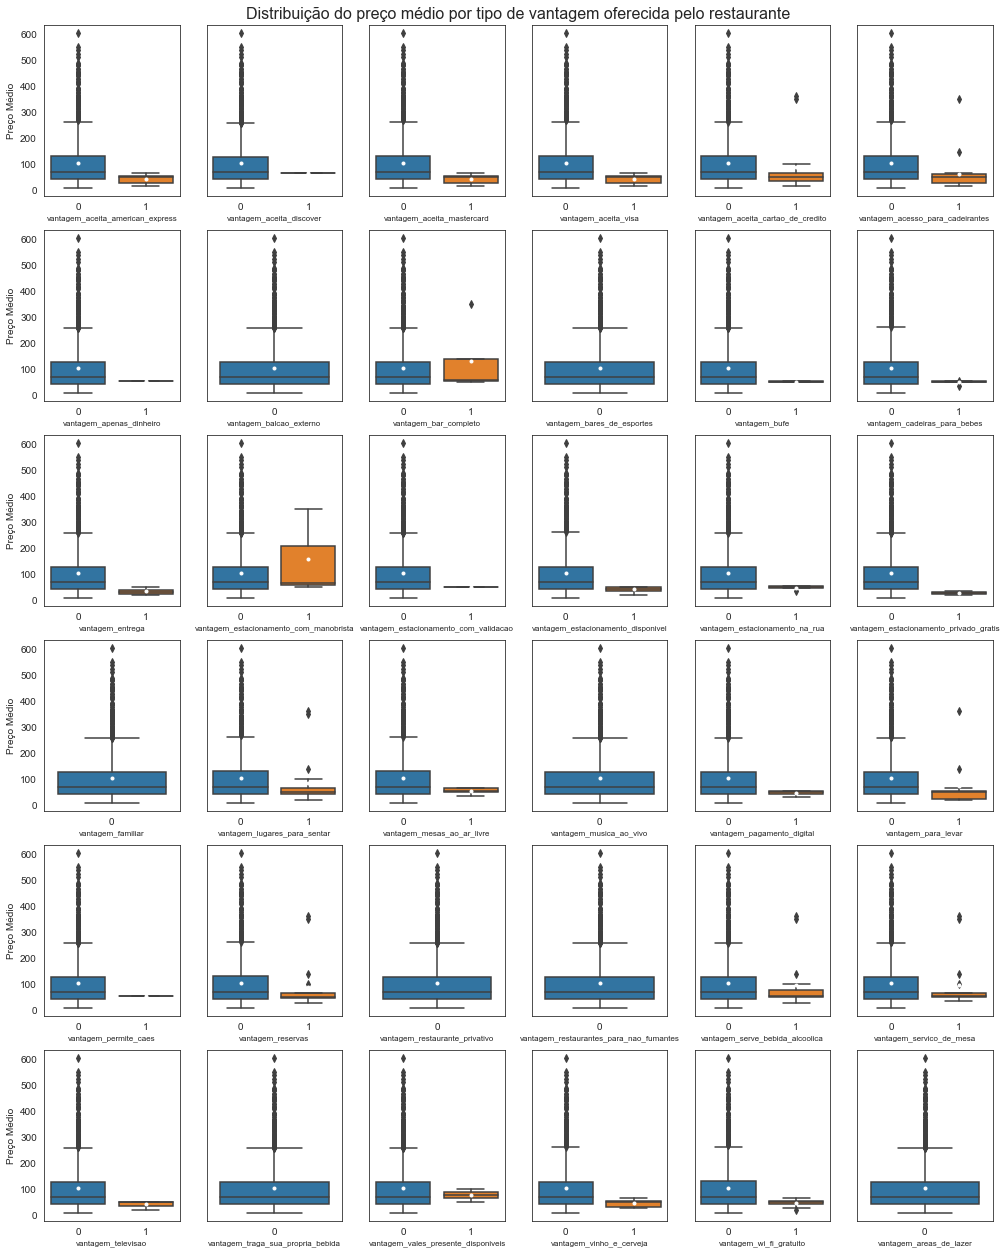

In [12]:
van = ['van']

for i in range(len(df_restaurantes_preco.columns)):
    
    if str(df_restaurantes_preco.columns[i])[:3] == str('van'):
        van.append(df_restaurantes_preco.columns[i])
    else:
        continue

sns.set_style("white") # Grid do gráfico.
sns.color_palette("Spectral", as_cmap=True)
fig = plt.figure(figsize=(17,22))
plt.title('Distribuição do preço médio por tipo de vantagem oferecida pelo restaurante', loc='center', fontsize=16)
plt.axis('off') # Retirando legendas 

for i in range(1, len(van)):
    if (i in [1,7,13,19,25,31,37]):
        boxplot_esquerda(6, 6, i, van[i], "preco_medio", "Preço Médio")
    else:
        boxplot_direita(6, 6, i, van[i], "preco_medio")

plt.show()

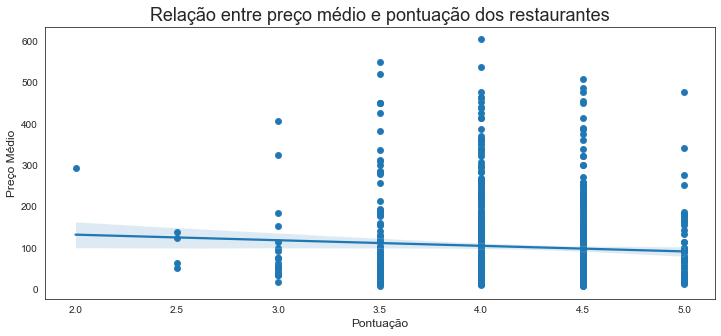

In [13]:
sns.set_style("white") # Grid do gráfico.
sns.color_palette("Spectral", as_cmap=True)
ax = sns.scatterplot(data=df_restaurantes_preco, x="pontuacao", y="preco_medio", s=40)
ax = sns.regplot(x="pontuacao", y="preco_medio", data=df_restaurantes_preco)
ax.figure.set_size_inches(12,5) # Tamanho do Gráfico
ax.set_title('Relação entre preço médio e pontuação dos restaurantes', loc='center', fontsize=18) #loc=alinhamento, fontsize=tamanho
ax.set_xlabel('Pontuação', fontsize=12)
ax.set_ylabel('Preço Médio', fontsize=12)

ax=ax

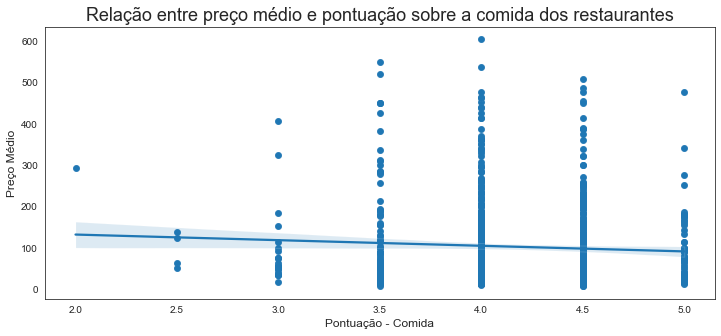

In [14]:
sns.set_style("white") # Grid do gráfico.
sns.color_palette("Spectral", as_cmap=True)
ax = sns.scatterplot(data=df_restaurantes_preco, x="pontuacao_comida", y="preco_medio", s=40)
ax = sns.regplot(x="pontuacao_comida", y="preco_medio", data=df_restaurantes_preco)
ax.figure.set_size_inches(12,5) # Tamanho do Gráfico
ax.set_title('Relação entre preço médio e pontuação sobre a comida dos restaurantes', loc='center', fontsize=18) #loc=alinhamento, fontsize=tamanho
ax.set_xlabel('Pontuação - Comida', fontsize=12)
ax.set_ylabel('Preço Médio', fontsize=12)

ax=ax

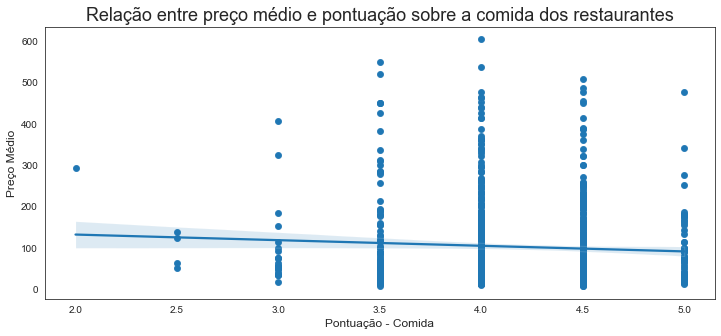

In [15]:
sns.set_style("white") # Grid do gráfico.
sns.color_palette("Spectral", as_cmap=True)
ax = sns.scatterplot(data=df_restaurantes_preco, x="pontuacao_comida", y="preco_medio", s=40)
ax = sns.regplot(x="pontuacao_comida", y="preco_medio", data=df_restaurantes_preco)
ax.figure.set_size_inches(12,5) # Tamanho do Gráfico
ax.set_title('Relação entre preço médio e pontuação sobre a comida dos restaurantes', loc='center', fontsize=18) #loc=alinhamento, fontsize=tamanho
ax.set_xlabel('Pontuação - Comida', fontsize=12)
ax.set_ylabel('Preço Médio', fontsize=12)

ax=ax

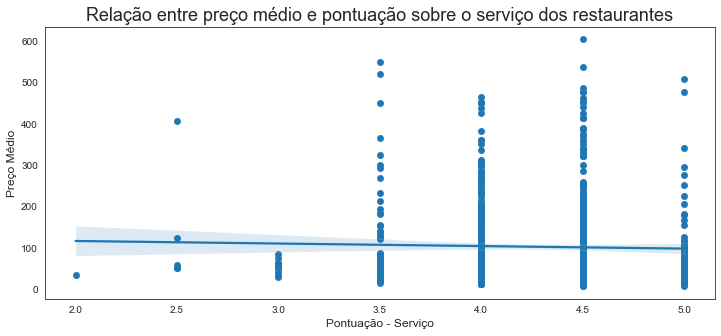

In [16]:
sns.set_style("white") # Grid do gráfico.
sns.color_palette("Spectral", as_cmap=True)
ax = sns.scatterplot(data=df_restaurantes_preco, x="pontuacao_servico", y="preco_medio", s=40)
ax = sns.regplot(x="pontuacao_servico", y="preco_medio", data=df_restaurantes_preco)
ax.figure.set_size_inches(12,5) # Tamanho do Gráfico
ax.set_title('Relação entre preço médio e pontuação sobre o serviço dos restaurantes', loc='center', fontsize=18) #loc=alinhamento, fontsize=tamanho
ax.set_xlabel('Pontuação - Serviço', fontsize=12)
ax.set_ylabel('Preço Médio', fontsize=12)

ax=ax

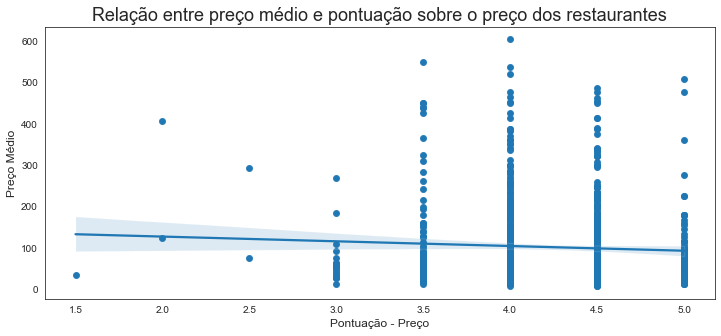

In [17]:
sns.set_style("white") # Grid do gráfico.
sns.color_palette("Spectral", as_cmap=True)
ax = sns.scatterplot(data=df_restaurantes_preco, x="pontuacao_preco", y="preco_medio", s=40)
ax = sns.regplot(x="pontuacao_preco", y="preco_medio", data=df_restaurantes_preco)
ax.figure.set_size_inches(12,5) # Tamanho do Gráfico
ax.set_title('Relação entre preço médio e pontuação sobre o preço dos restaurantes', loc='center', fontsize=18) #loc=alinhamento, fontsize=tamanho
ax.set_xlabel('Pontuação - Preço', fontsize=12)
ax.set_ylabel('Preço Médio', fontsize=12)

ax=ax

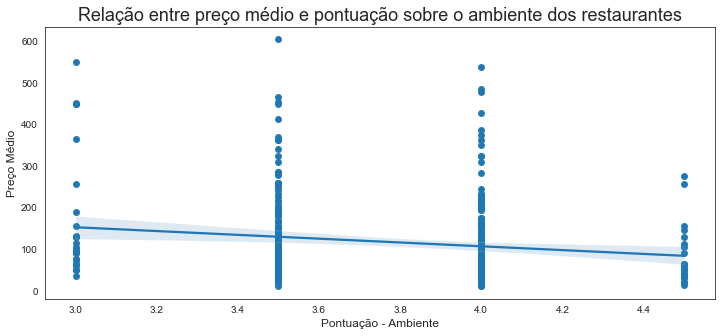

In [18]:
sns.set_style("white") # Grid do gráfico.
sns.color_palette("Spectral", as_cmap=True)
ax = sns.scatterplot(data=df_restaurantes_preco, x="pontuacao_ambiente", y="preco_medio", s=40)
ax = sns.regplot(x="pontuacao_ambiente", y="preco_medio", data=df_restaurantes_preco)
ax.figure.set_size_inches(12,5) # Tamanho do Gráfico
ax.set_title('Relação entre preço médio e pontuação sobre o ambiente dos restaurantes', loc='center', fontsize=18) #loc=alinhamento, fontsize=tamanho
ax.set_xlabel('Pontuação - Ambiente', fontsize=12)
ax.set_ylabel('Preço Médio', fontsize=12)

ax=ax